In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Extracting Data

In [3]:
def load_data(file_name):
  '''
    Menampilkan data yang tersedia.

      Parameters:
        filename (str): Nama file yang tersedia

      Return:
        File Dataframe (DataFrame)
  '''

  df = pd.read_csv(file_name)
  return df

In [4]:
df = load_data('data/fashion_products.csv')
df.head()

,User ID,Product ID,Product Name,Brand,Category,Price,Rating,Color,Size
0,19,1,Dress,Adidas,Men's Fashion,40,1.043159,Black,XL
1,97,2,Shoes,H&M,Women's Fashion,82,4.026416,Black,L
2,25,3,Dress,Adidas,Women's Fashion,44,3.337938,Yellow,XL
3,57,4,Shoes,Zara,Men's Fashion,23,1.049523,White,S
4,79,5,T-shirt,Adidas,Men's Fashion,79,4.302773,Black,M


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   User ID       1000 non-null   int64  
 1   Product ID    1000 non-null   int64  
 2   Product Name  1000 non-null   object 
 3   Brand         1000 non-null   object 
 4   Category      1000 non-null   object 
 5   Price         1000 non-null   int64  
 6   Rating        1000 non-null   float64
 7   Color         1000 non-null   object 
 8   Size          1000 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB


#Check Data

In [6]:
def check_data(data):
  '''
    Mengecek data null dan data duplikat.

      Parameters:
        data: Data yang ingin dicek

      Return:
        (str): Jumlah data null dan data duplikat
  '''

  null_data = data.isnull().sum()
  duplicated_data = data.duplicated().sum()

  print(f"Null Data:\n{null_data}\n\nDuplicated Data: {duplicated_data}" )

In [7]:
check_data(df)

Null Data:
User ID         0
Product ID      0
Product Name    0
Brand           0
Category        0
Price           0
Rating          0
Color           0
Size            0
dtype: int64

Duplicated Data: 0


#Cleaning Data

In [8]:
df['Rating'] = df['Rating'].round(0)

In [9]:
df.head()

,User ID,Product ID,Product Name,Brand,Category,Price,Rating,Color,Size
0,19,1,Dress,Adidas,Men's Fashion,40,1.0,Black,XL
1,97,2,Shoes,H&M,Women's Fashion,82,4.0,Black,L
2,25,3,Dress,Adidas,Women's Fashion,44,3.0,Yellow,XL
3,57,4,Shoes,Zara,Men's Fashion,23,1.0,White,S
4,79,5,T-shirt,Adidas,Men's Fashion,79,4.0,Black,M


#EDA

Text(0, 0.5, 'Total User')

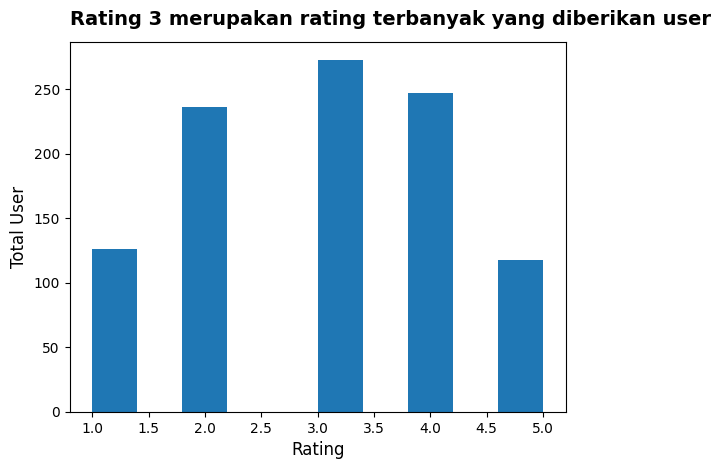

In [10]:
df.Rating.plot.hist()

plt.text(x=0.8, y=300, s='Rating 3 merupakan rating terbanyak yang diberikan user', fontweight='bold', fontsize=14)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Total User', fontsize=12)

In [11]:
print(f'Category Unique: {df["Category"].unique()}')
print(f'Brand Unique: {df["Brand"].unique()}')
print(f'Product Name Unique: {df["Product Name"].unique()}')
print(f'Color Unique: {df["Color"].unique()}')

Category Unique: ["Men's Fashion" "Women's Fashion" "Kids' Fashion"]
Brand Unique: ['Adidas' 'H&M' 'Zara' 'Gucci' 'Nike']
Product Name Unique: ['Dress' 'Shoes' 'T-shirt' 'Jeans' 'Sweater']
Color Unique: ['Black' 'Yellow' 'White' 'Blue' 'Green' 'Red']


Text(0, 0.5, 'Category')

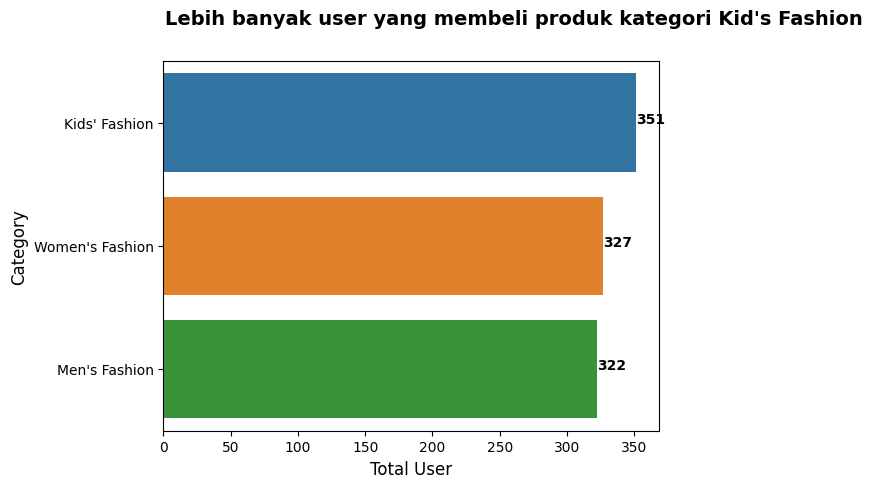

In [12]:
most_cat = df.groupby(['Category'])['User ID'].count().reset_index().sort_values(by='User ID', ascending=False)

fig, ax = plt.subplots()

sns.barplot(data=most_cat, y='Category', x='User ID', orient='h')

for i, v in enumerate(most_cat['User ID']):
    ax.text(v, i, str(v),
            color = 'black', fontweight = 'bold')

plt.text(x=1, y=-0.8, s="Lebih banyak user yang membeli produk kategori Kid's Fashion", fontweight='bold', fontsize=14)
plt.xlabel('Total User', fontsize=12)
plt.ylabel('Category', fontsize=12)

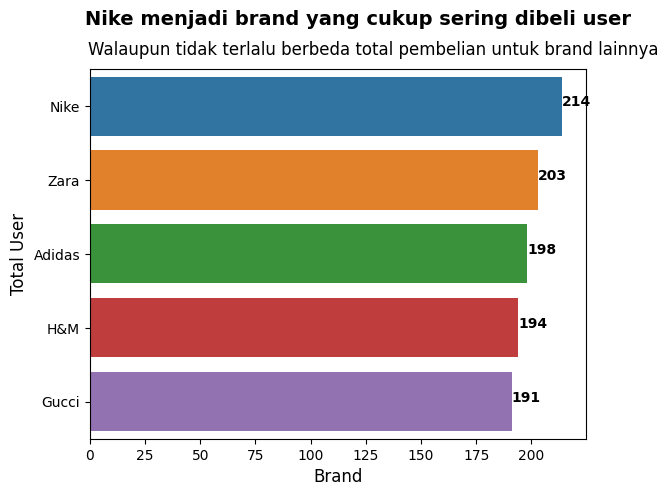

In [13]:
most_cat = df.groupby(['Brand'])['User ID'].count().reset_index().sort_values(by='User ID', ascending=False)

fig, ax = plt.subplots()

sns.barplot(data=most_cat, y='Brand', x='User ID', orient='h')

for i, v in enumerate(most_cat['User ID']):
    ax.text(v, i, str(v),
            color = 'black', fontweight = 'bold')

plt.text(x=-2, y=-1.1, s="Nike menjadi brand yang cukup sering dibeli user", fontweight='bold', fontsize=14)
plt.text(x=-1, y=-0.7, s="Walaupun tidak terlalu berbeda total pembelian untuk brand lainnya", fontsize=12)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Total User', fontsize=12)

plt.show()

Text(0, 0.5, 'Category')

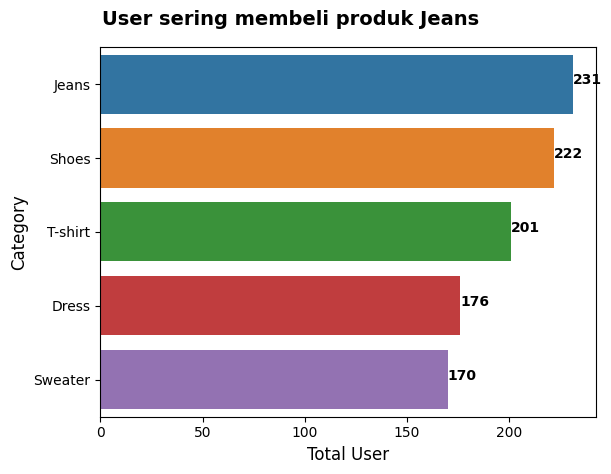

In [14]:
most_cat = df.groupby(['Product Name'])['User ID'].count().reset_index().sort_values(by='User ID', ascending=False)

fig, ax = plt.subplots()

sns.barplot(data=most_cat, y='Product Name', x='User ID', orient='h')

for i, v in enumerate(most_cat['User ID']):
    ax.text(v, i, str(v),
            color = 'black', fontweight = 'bold')

plt.text(x=1, y=-0.8, s="User sering membeli produk Jeans", fontweight='bold', fontsize=14)
plt.xlabel('Total User', fontsize=12)
plt.ylabel('Category', fontsize=12)

Text(0, 0.5, 'Total User')

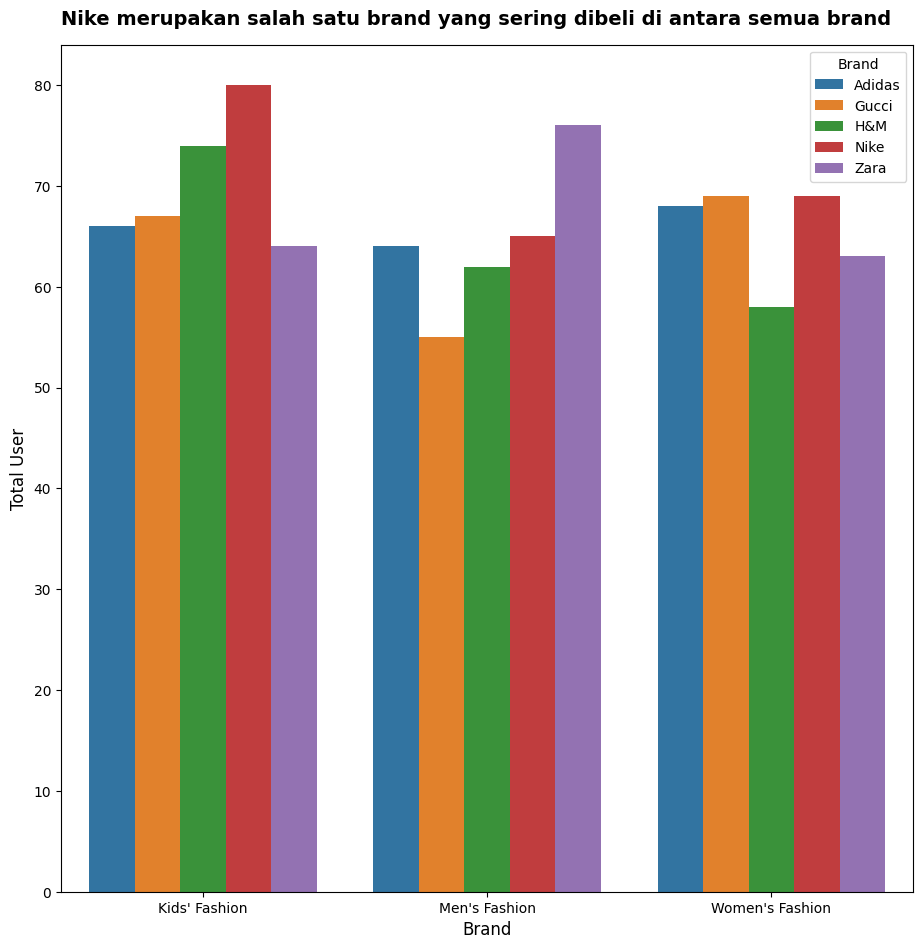

In [15]:
most_cat = df.groupby(['Category', 'Brand']).agg({
    'User ID': 'count'
}).reset_index()

fig, ax = plt.subplots(figsize=(11, 11))

sns.barplot(data=most_cat, x='Category', y='User ID', hue='Brand')

plt.text(x=-0.5, y=86, s="Nike merupakan salah satu brand yang sering dibeli di antara semua brand", fontweight='bold', fontsize=14)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Total User', fontsize=12)

Text(0, 0.5, 'Rating')

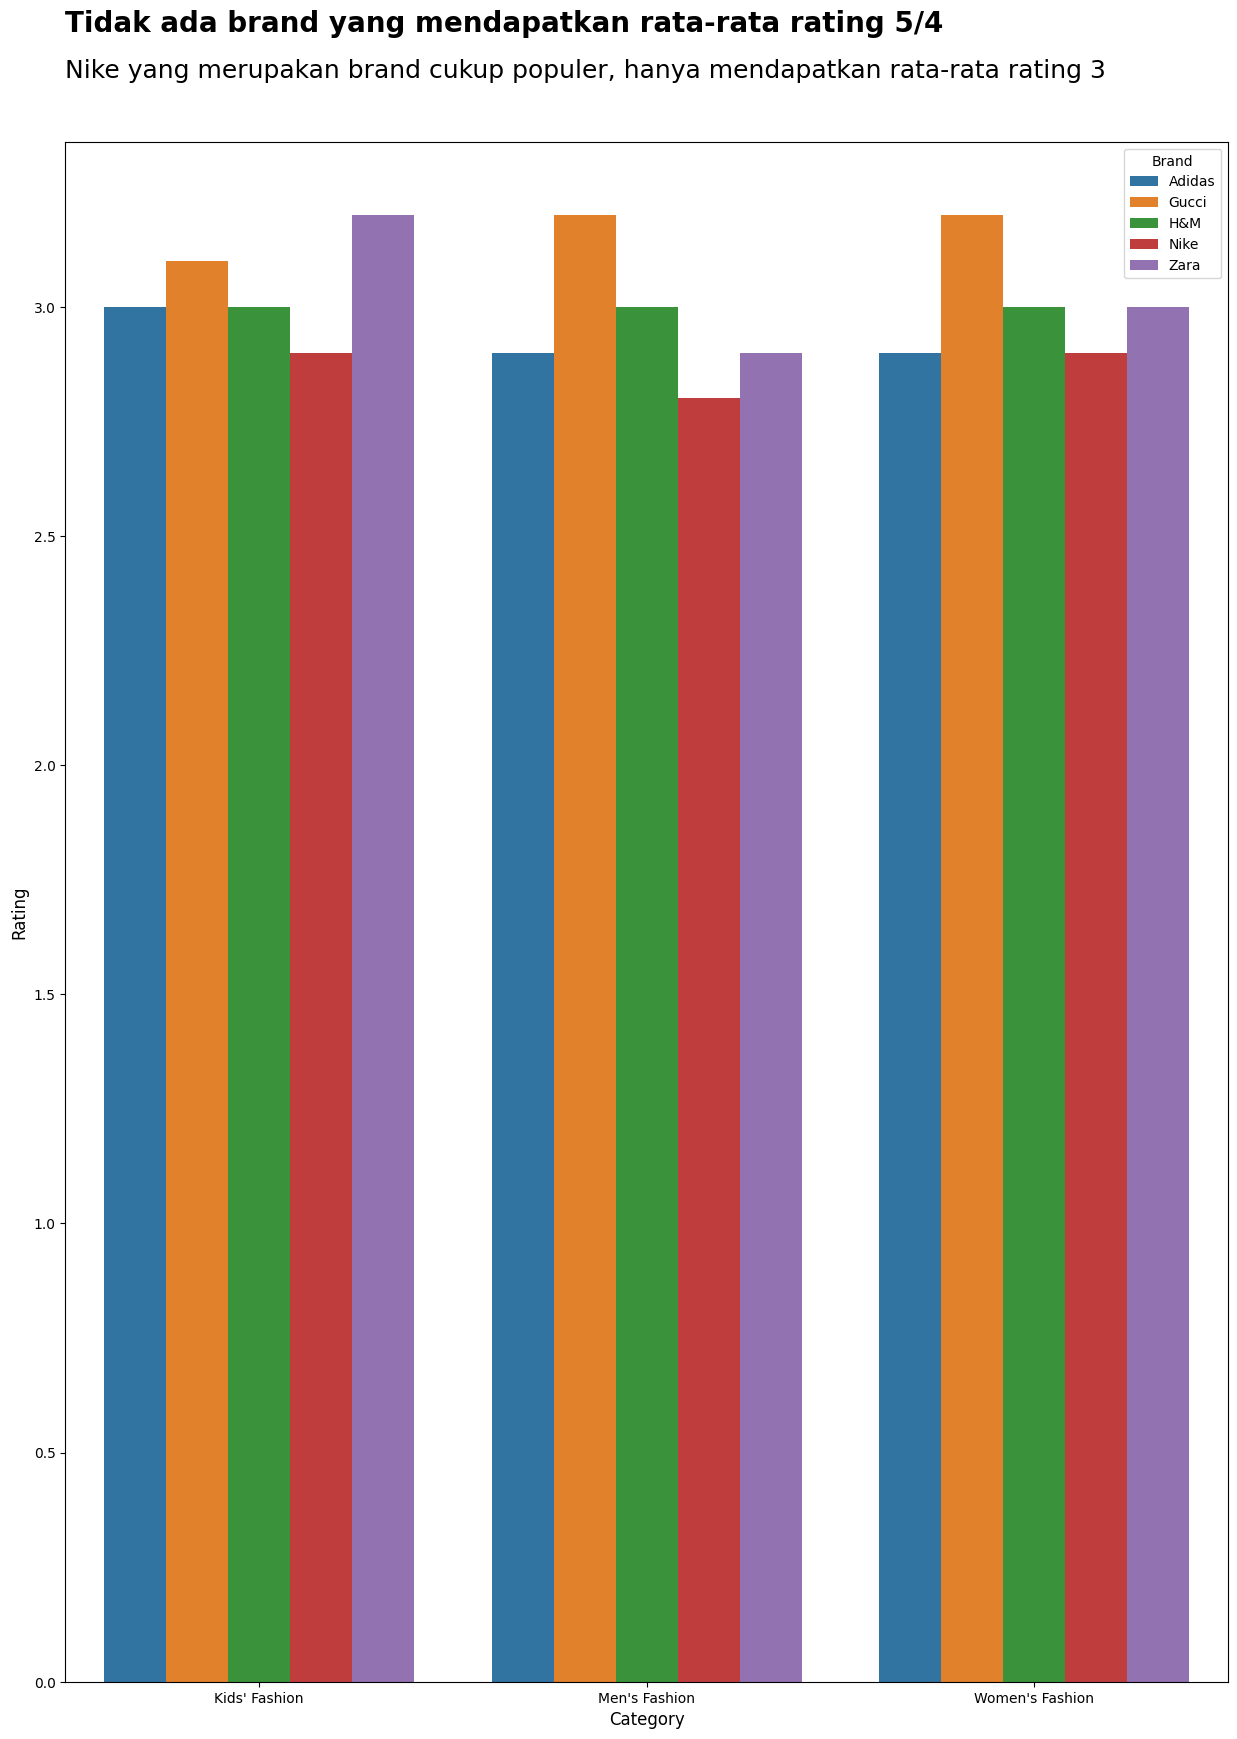

In [16]:
most_cat = df.groupby(['Category', 'Brand']).agg({
    'Rating': 'mean'
}).reset_index().round(1)

fig, ax = plt.subplots(figsize=(15, 20))

sns.barplot(data=most_cat, x='Category', y='Rating', hue='Brand')

plt.text(x=-0.5, y=3.6, s="Tidak ada brand yang mendapatkan rata-rata rating 5/4", fontweight='bold', fontsize=20)
plt.text(x=-0.5, y=3.5, s="Nike yang merupakan brand cukup populer, hanya mendapatkan rata-rata rating 3", fontsize=18)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Rating', fontsize=12)

In [17]:
most_cat = df.groupby(['Category', 'Brand']).agg({
    'Rating': 'mean',
    'User ID': 'count'
})

most_cat

Rating  User ID
Category        Brand                    
Kids' Fashion   Adidas  3.045455       66
                Gucci   3.059701       67
                H&M     3.013514       74
                Nike    2.925000       80
                Zara    3.187500       64
Men's Fashion   Adidas  2.875000       64
                Gucci   3.163636       55
                H&M     3.048387       62
                Nike    2.800000       65
                Zara    2.868421       76
Women's Fashion Adidas  2.867647       68
                Gucci   3.246377       69
                H&M     2.982759       58
                Nike    2.913043       69
                Zara    2.984127       63

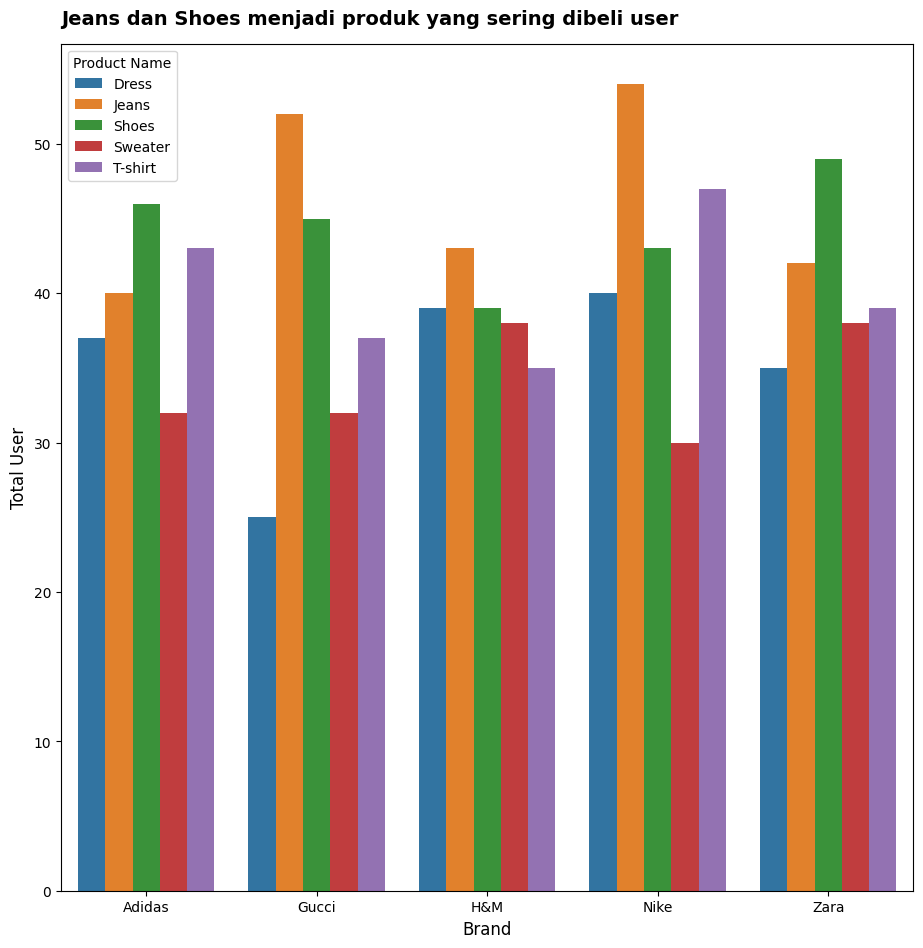

In [18]:
most_cat = df.groupby(['Brand', 'Product Name']).agg({
    'User ID': 'count'
}).reset_index()

fig, ax = plt.subplots(figsize=(11, 11))

sns.barplot(data=most_cat, x='Brand', y='User ID', hue='Product Name')

plt.text(x=-0.5, y=58, s="Jeans dan Shoes menjadi produk yang sering dibeli user", fontweight='bold', fontsize=14)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Total User', fontsize=12)

plt.show()

Text(0, 0.5, 'Rating')

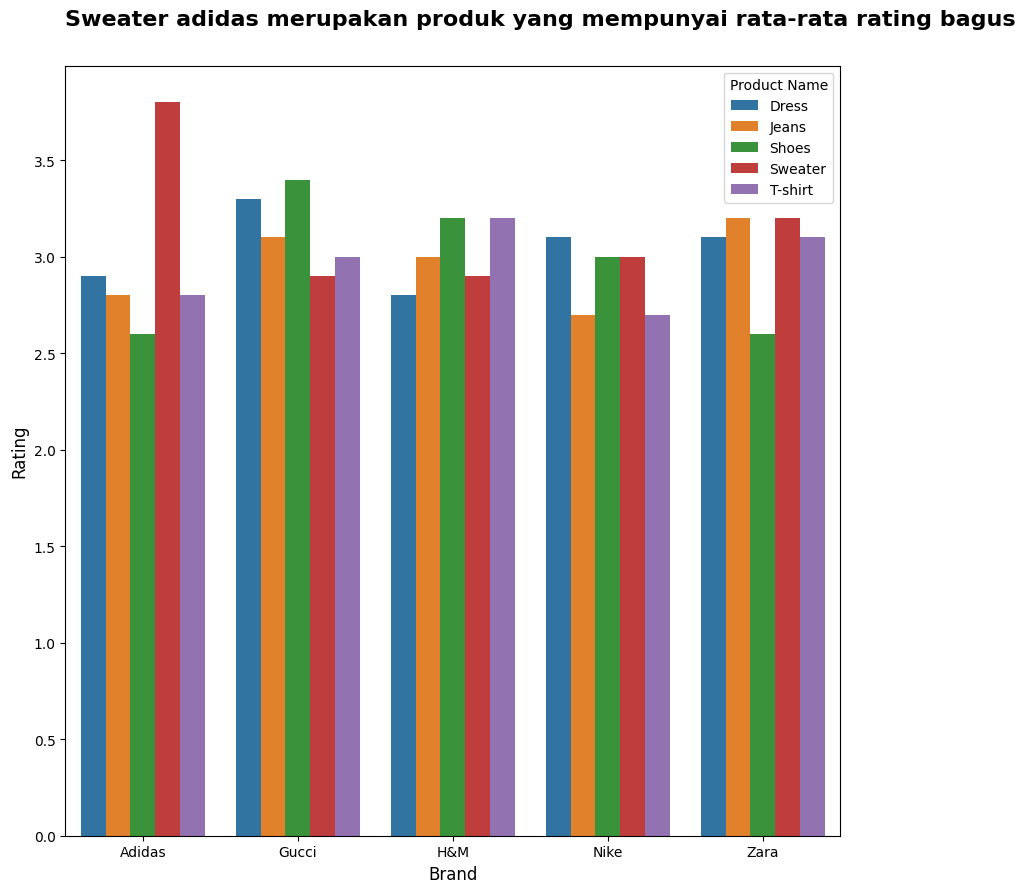

In [19]:
most_cat = df.groupby(['Brand', 'Product Name']).agg({
    'Rating': 'mean'
}).reset_index().round(1)

fig, ax = plt.subplots(figsize=(10, 10))

sns.barplot(data=most_cat, x='Brand', y='Rating', hue='Product Name')

plt.text(x=-0.5, y=4.2, s="Sweater adidas merupakan produk yang mempunyai rata-rata rating bagus", fontweight='bold', fontsize=16)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Rating', fontsize=12)

In [20]:
most_cat = df.groupby(['Brand', 'Product Name']).agg({
    'Rating': 'mean',
    'User ID': 'count'
})

most_cat

Rating  User ID
Brand  Product Name                   
Adidas Dress         2.918919       37
       Jeans         2.850000       40
       Shoes         2.565217       46
       Sweater       3.750000       32
       T-shirt       2.790698       43
Gucci  Dress         3.320000       25
       Jeans         3.115385       52
       Shoes         3.377778       45
       Sweater       2.937500       32
       T-shirt       3.027027       37
H&M    Dress         2.769231       39
       Jeans         3.046512       43
       Shoes         3.179487       39
       Sweater       2.921053       38
       T-shirt       3.171429       35
Nike   Dress         3.075000       40
       Jeans         2.722222       54
       Shoes         3.023256       43
       Sweater       2.966667       30
       T-shirt       2.723404       47
Zara   Dress         3.085714       35
       Jeans         3.190476       42
       Shoes         2.571429       49
       Sweater       3.157895       38
       T-shirt       3.128205       39